In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:45505")
client

<Client: 'tcp://127.0.0.1:45505' processes=8 threads=40, memory=157.35 GiB>

In [2]:
import numpy as np
import xarray as xr
import os.path as op

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/tank/spectre/tuchida/AVISO/'

In [4]:
ds = xr.open_dataset(op.join(ddir,
                             '04-2023/dataset-uv-nrt-daily_20230401T1200Z_P20230726T0000.nc')
                    )
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 720, longitude: 1440, depth: 2)
Coordinates:
  * time       (time) datetime64[ns] 2023-04-01T12:00:00
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth      (depth) int16 0 15
Data variables: (12/13)
    crs        int32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    ue         (time, depth, latitude, longitude) float32 ...
    ve         (time, depth, latitude, longitude) float32 ...
    ugos       (time, latitude, longitude) float32 ...
    ...         ...
    err_uo     (time, depth, latitude, longitude) float32 ...
    err_vo     (time, depth, latitude, longitude) float32 ...
    err_ue     (time, depth, latitude, longitude) float32 ...
    err_ve     (time, depth, latitude, longitude) float32 ...
    err_ugos   (time, depth, latitude, longitude) float32 ...
    err_vgos   (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    geospatial_lon_units:     degrees_east
    geospatial_vertical_max:  0.0
    product_version:          3.0
    geospatial_lat_units:     degrees_north
    creation_date:            2023-07-26 12:11:51
    contact:                  servicedesk.cmems@mercator-ocean.eu
    ...                       ...
    lon_max:                  179.875
    lon_res:                  0.25
    lat_min:                  -89.875
    lat_max:                  89.875
    lat_res:                  0.25
    title:                    Daily mean total surface and 15m velocities

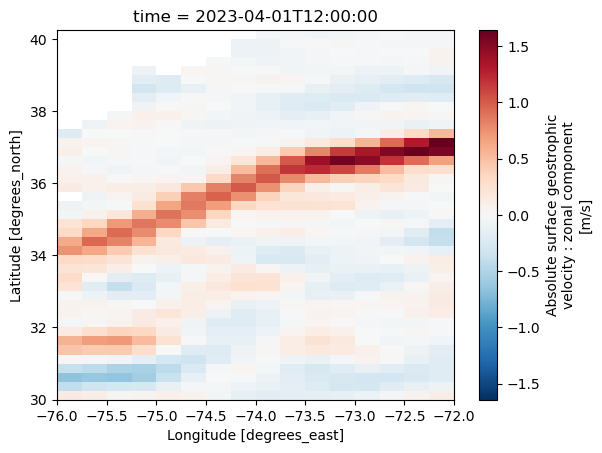

In [8]:
ds.ugos.sel(latitude=slice(30,40.25), longitude=slice(284-360,288-360)
           ).plot()